<a href="https://colab.research.google.com/github/atomsplitter/AI-Class-Assignment-1/blob/main/Copy_of_C5233_assignment1_abc123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793: Assignment-1

**Salas - David - (umv194)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

from google.colab import drive
import os

# Mounting Google Drive
drive.mount('/content/drive')

# Detecting whether it's "My Drive" or "MyDrive"
if os.path.exists("/content/drive/My Drive"):
    basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
elif os.path.exists("/content/drive/MyDrive"):
    basePath = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/"
else:
    raise FileNotFoundError("Could not find 'My Drive' or 'MyDrive'. Check your Google Drive mount.")

print("Base path set to:", basePath)

# Checking my files are there
print("Files in Data folder:", os.listdir(basePath))


Mounted at /content/drive
Base path set to: /content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/
Files in Data folder: ['cities.csv', 'distances.csv', 'texas-map-2.png']


In [ ]:
# Loaded the graph data from the files
import os
import pandas as pd

cities_file = os.path.join(basePath, "cities.csv")
distances_file = os.path.join(basePath, "distances.csv")

cities_df = pd.read_csv(cities_file, header=None, names=["City", "Latitude", "Longitude"])
distances_df = pd.read_csv(distances_file, header=None, names=["City1", "City2", "Distance"])

print("Cities Data:")
print(cities_df.head())
print("\nDistances Data:")
print(distances_df.head())

Cities Data:
       City  Latitude  Longitude
0   Abilene   32.4543   -99.7384
1     Alice   27.7556   -98.0653
2  Amarillo   35.1989  -101.8310
3    Austin   30.3006   -97.7517
4  Beaumont   30.0850   -94.1451

Distances Data:
         City1          City2    Distance
0   San Angelo        Midland  112.283423
1   San Angelo        Lubbock  185.113579
2   San Angelo        Abilene   95.269070
3   San Angelo    San Antonio  210.849482
4  San Antonio  New Braunfels   30.808767


Graph built   Nodes: 39  Edges: 47


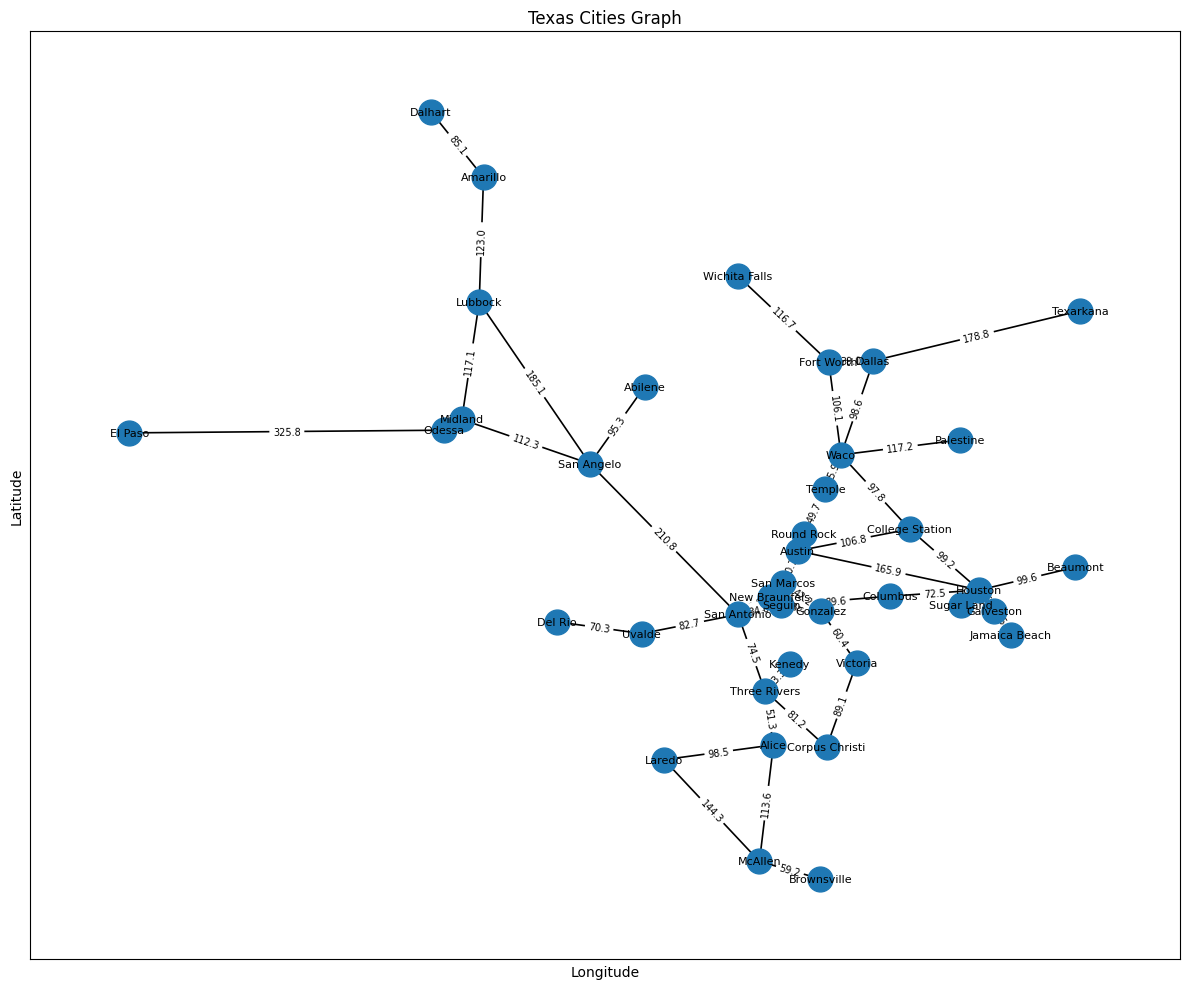

In [ ]:
# Builds a weighted graph from cities_df and distances_df ---

import networkx as nx

# Creates an undirected weighted graph

G = nx.Graph()

# this adds nodes with (lon, lat) positions for plotting

for _, r in cities_df.iterrows():
    city = r["City"]
    lat  = float(r["Latitude"])
    lon  = float(r["Longitude"])
    G.add_node(city, pos=(lon, lat))

# this adds weighted edges

missing = []
for _, r in distances_df.iterrows():
    c1, c2 = r["City1"], r["City2"]
    w = float(r["Distance"])
    if c1 in G and c2 in G:
        G.add_edge(c1, c2, weight=w)
    else:
        missing.append((c1, c2))

print(f"Graph built   Nodes: {G.number_of_nodes()}  Edges: {G.number_of_edges()}")
if missing:
    print("⚠️ Some edges reference cities not in cities.csv:", missing[:5], "..." if len(missing) > 5 else "")


# Display a 2D graph of the given data.

import matplotlib.pyplot as plt

pos = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=320)
nx.draw_networkx_edges(G, pos, width=1.2)
nx.draw_networkx_labels(G, pos, font_size=8)

# Edge-weight labels (rounded to 1 decimal). Comment out if too busy.

edge_labels = {e: f"{d:.1f}" for e, d in nx.get_edge_attributes(G, "weight").items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Texas Cities Graph")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

✅ Cities sample:
       City  Latitude  Longitude
0   Abilene   32.4543   -99.7384
1     Alice   27.7556   -98.0653
2  Amarillo   35.1989  -101.8310
3    Austin   30.3006   -97.7517
4  Beaumont   30.0850   -94.1451

✅ Distances sample:
         City1          City2    Distance
0   San Angelo        Midland  112.283423
1   San Angelo        Lubbock  185.113579
2   San Angelo        Abilene   95.269070
3   San Angelo    San Antonio  210.849482
4  San Antonio  New Braunfels   30.808767
Graph built ✅  Nodes: 39  Edges: 47

🦠 Infection order (BFS):
Three Rivers → Alice → Corpus Christi → Kenedy → San Antonio → Laredo → McAllen → Victoria → New Braunfels → San Angelo → Seguin → Uvalde → Brownsville → Gonzalez → San Marcos → Abilene → Lubbock → Midland → Columbus → Del Rio → Austin → Amarillo → Odessa → Houston → College Station → Round Rock → Dalhart → El Paso → Beaumont → Galveston → Sugar Land → Waco → Temple → Jamaica Beach → Dallas → Fort Worth → Palestine → Texarkana → Wichita Falls

📏 

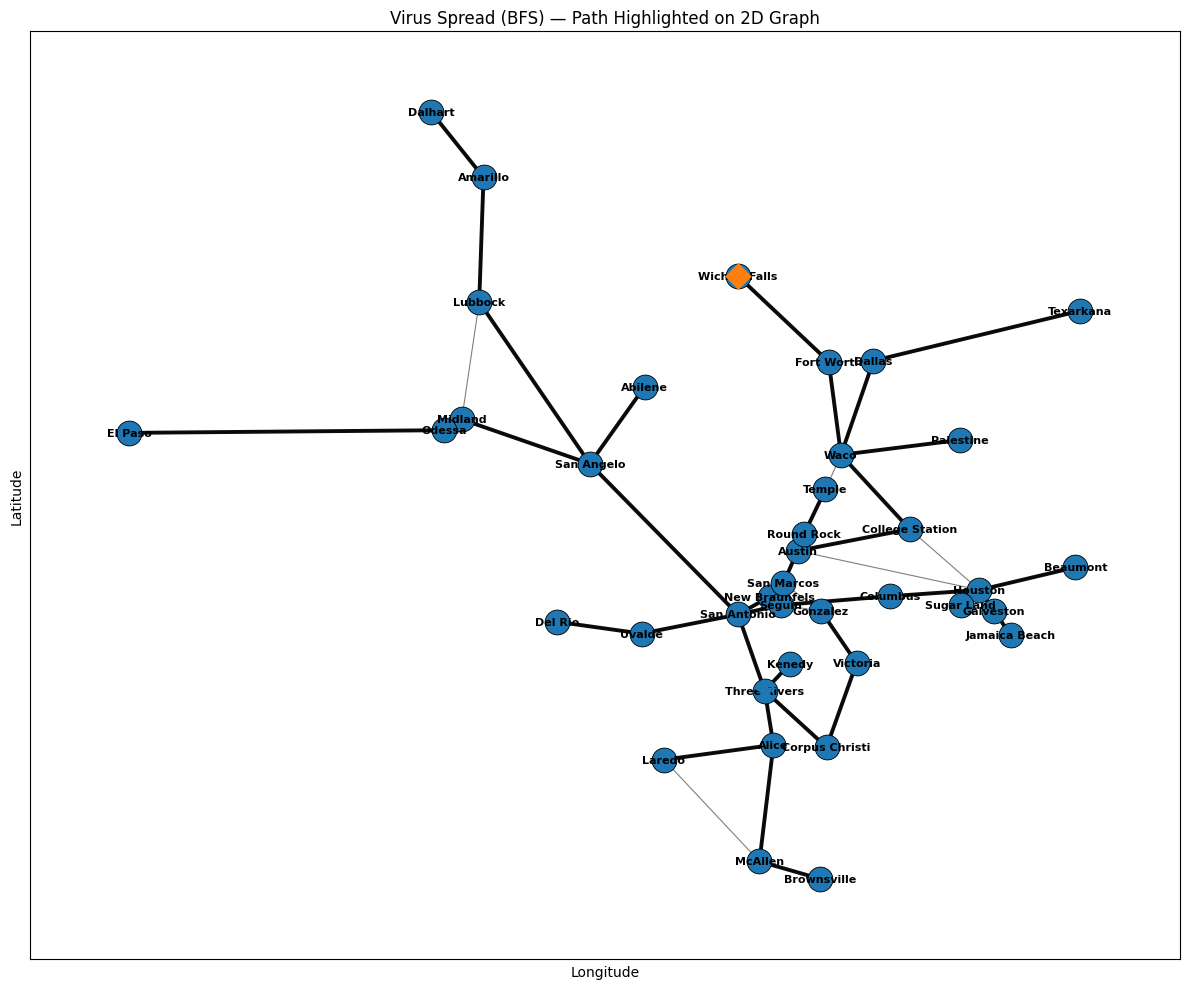

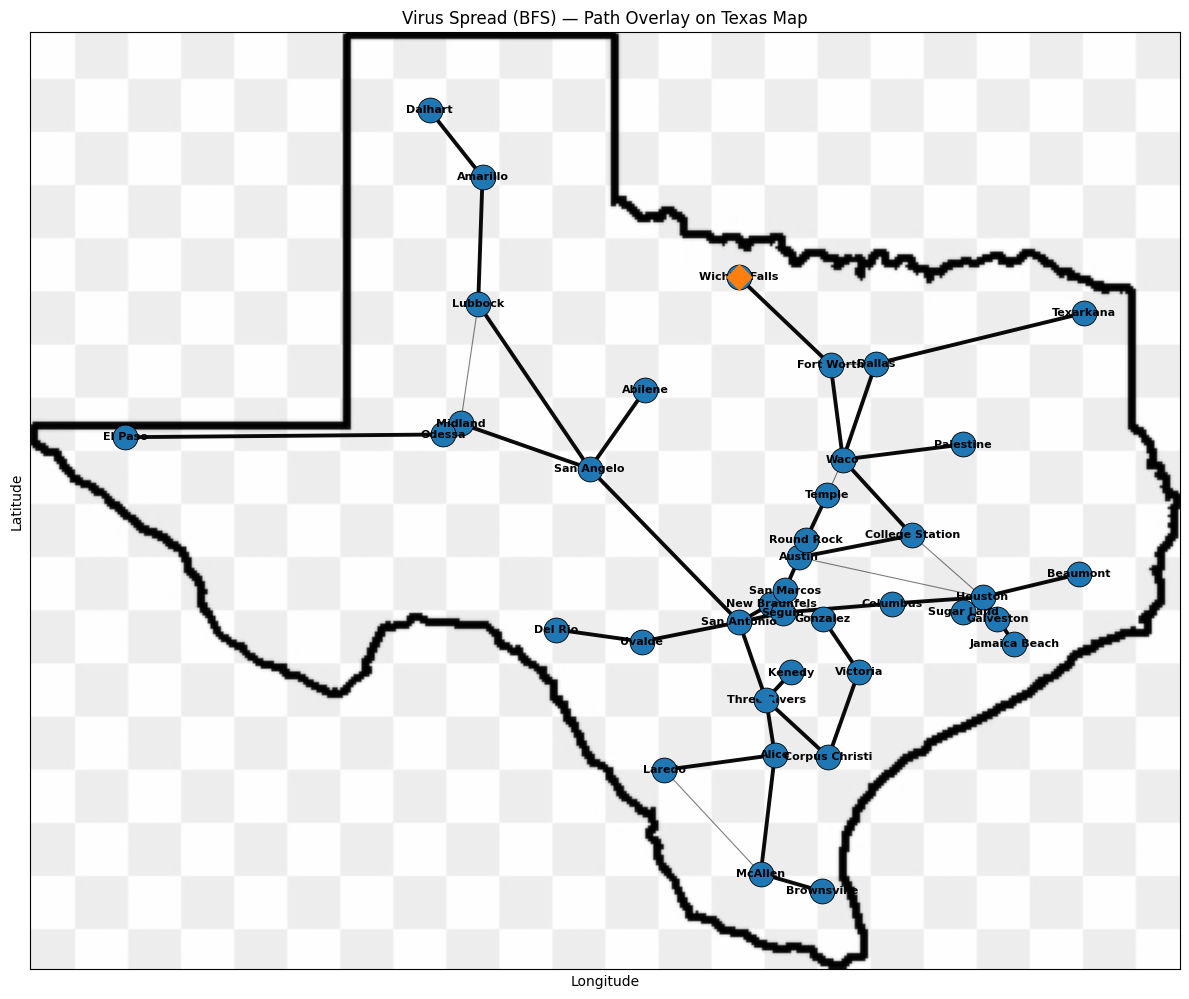

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
import os
import pandas as pd

# Paths to your files (make sure basePath is set correctly to your Drive/Data folder)
cities_file = os.path.join(basePath, "cities.csv")
distances_file = os.path.join(basePath, "distances.csv")

cities_df = pd.read_csv(cities_file, header=None, names=["City", "Latitude", "Longitude"])
distances_df = pd.read_csv(distances_file, header=None, names=["City1", "City2", "Distance"])

print("✅ Cities sample:")
print(cities_df.head())

print("\n✅ Distances sample:")
print(distances_df.head())

import networkx as nx
from collections import deque

# --- Step 1: Build the graph G from your CSV data ---
G = nx.Graph()

# Add nodes with positions
for _, r in cities_df.iterrows():
    city, lat, lon = r["City"], float(r["Latitude"]), float(r["Longitude"])
    G.add_node(city, pos=(lon, lat))

# Add edges with weights
for _, r in distances_df.iterrows():
    c1, c2, d = r["City1"], r["City2"], float(r["Distance"])
    if c1 in G and c2 in G:
        G.add_edge(c1, c2, weight=d)

print(f"Graph built ✅  Nodes: {G.number_of_nodes()}  Edges: {G.number_of_edges()}")

# --- Step 2: BFS infection function ---
def bfs_infection(G, start="Three Rivers"):
    if start not in G:
        raise ValueError(f"Start city '{start}' not found in graph.")

    visited = set([start])
    order = [start]
    parent = {start: None}
    q = deque([start])

    while q:
        u = q.popleft()
        for v in sorted(G.neighbors(u)):
            if v not in visited:
                visited.add(v)
                parent[v] = u
                order.append(v)
                q.append(v)

    # Calculate total distance
    total_distance = 0.0
    edge_list = []
    for city in order:
        p = parent[city]
        if p is not None:
            w = float(G[p][city]['weight'])
            total_distance += w
            edge_list.append((p, city))

    return order, total_distance, edge_list, parent

# --- Step 3: Run BFS infection ---
infection_order, distance_traveled, infection_edges, infection_parent = bfs_infection(G, start="Three Rivers")

print("\n🦠 Infection order (BFS):")
print(" → ".join(infection_order))
print(f"\n📏 Total distance traveled by this BFS spread: {distance_traveled:.2f}")
print(f"🏙️ Total cities visited: {len(infection_order)} / {G.number_of_nodes()}")

import os, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx

# Reuse positions (build if missing)
pos = nx.get_node_attributes(G, "pos")
assert pos, "No node positions found. Make sure you built G with node attribute pos=(lon, lat)."

# Make sure our path edgelist is in infection order
path_edges = infection_edges[:]  # already produced in order from the BFS cell
start_city = infection_order[0]
end_city = infection_order[-1]

# Plot 1: 2D graph with BFS path highlighted
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=280, node_color="#cfe8ff", edgecolors='k', linewidths=0.5, alpha=0.95)
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Highlight the BFS path
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2.8, alpha=0.95)
# Emphasize visited cities
nx.draw_networkx_nodes(G, pos, nodelist=infection_order, node_size=320, edgecolors='k', linewidths=0.6)

# Mark start and end
plt.scatter([pos[start_city][0]], [pos[start_city][1]], s=220, marker='*', zorder=5)
plt.scatter([pos[end_city][0]],   [pos[end_city][1]],   s=160, marker='D', zorder=5)

plt.title("Virus Spread (BFS) — Path Highlighted on 2D Graph")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.tight_layout(); plt.show()


# Plot 2: Texas map overlay with BFS path
# Try a few likely locations for the map image
maybe_map = None
for candidate in [
    os.path.join(basePath, "texas-map-2.png"),  # if you uploaded it to Drive/Data
    "texas-map-2.png"                           # if you uploaded it to the Colab working dir
]:
    if os.path.exists(candidate):
        maybe_map = candidate
        break

plt.figure(figsize=(12, 10))

if maybe_map is not None:
    # Compute a reasonable extent from your graph coords
    lons = np.array([p[0] for p in pos.values()], dtype=float)
    lats = np.array([p[1] for p in pos.values()], dtype=float)
    pad_lon = (lons.max() - lons.min()) * 0.10
    pad_lat = (lats.max() - lats.min()) * 0.10
    extent = (lons.min()-pad_lon, lons.max()+pad_lon, lats.min()-pad_lat, lats.max()+pad_lat)

    img = mpimg.imread(maybe_map)
    plt.imshow(img, extent=extent, aspect='equal', zorder=0)

# Draw full graph faintly
nx.draw_networkx_nodes(G, pos, node_size=280, node_color="#cfe8ff", edgecolors='k', linewidths=0.5, alpha=0.95)
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Draw BFS path prominently
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2.8, alpha=0.95)
nx.draw_networkx_nodes(G, pos, nodelist=infection_order, node_size=320, edgecolors='k', linewidths=0.6)

# Start/end markers
plt.scatter([pos[start_city][0]], [pos[start_city][1]], s=220, marker='*', zorder=6)
plt.scatter([pos[end_city][0]],   [pos[end_city][1]],   s=160, marker='D', zorder=6)

plt.title("Virus Spread (BFS) — Path Overlay on Texas Map")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.tight_layout(); plt.show()



#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Optimal vaccine route (A*):
San Antonio → New Braunfels → San Marcos → Austin → College Station

Total distance (miles): 186.77


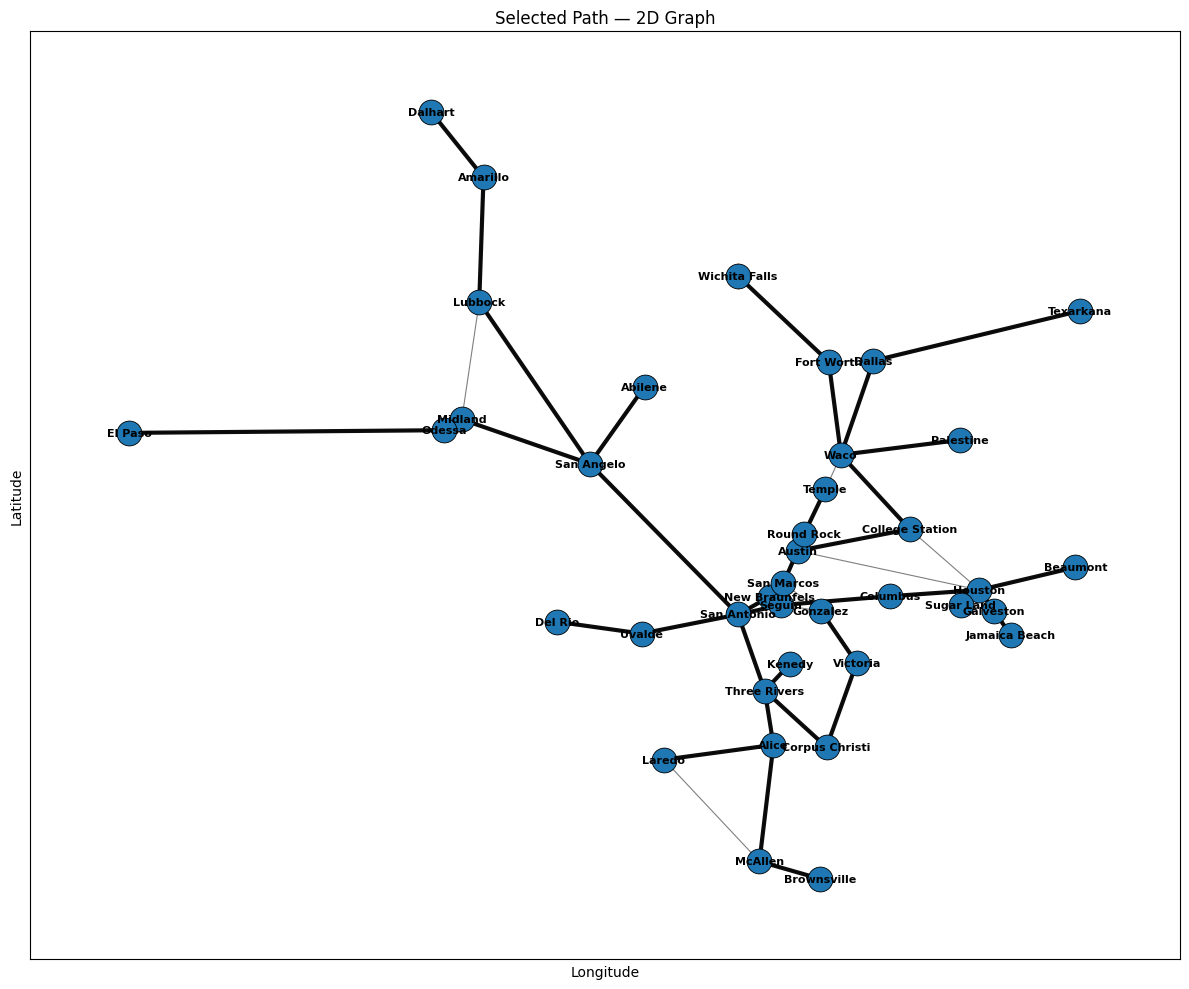

Map found: /content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/texas-map-2.png


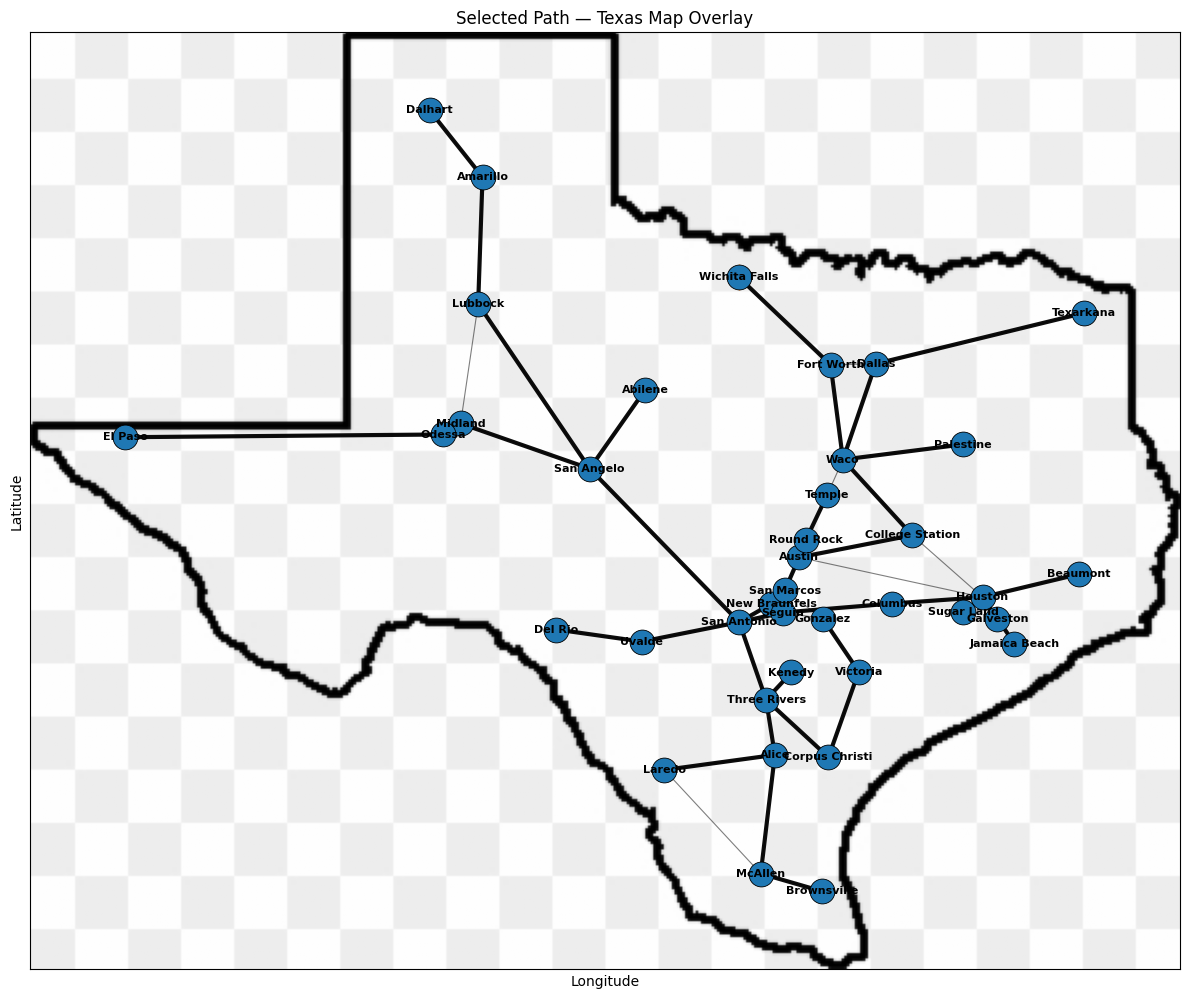

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'

import math, heapq
import networkx as nx

def haversine_miles(lat1, lon1, lat2, lon2):
    # earth radius (miles)
    R = 3958.7613
    # (assignment notes say ignore the sign for S/W; in Texas all longitudes are W so |diff| is unchanged,
    # but haversine works fine with signed values too)
    φ1, λ1, φ2, λ2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dφ = φ2 - φ1
    dλ = λ2 - λ1
    a = math.sin(dφ/2)**2 + math.cos(φ1)*math.cos(φ2)*math.sin(dλ/2)**2
    c = 2*math.asin(math.sqrt(a))
    return R * c

def astar_vaccine(G, start="San Antonio", goal="College Station"):
    if start not in G or goal not in G:
        raise ValueError("Start/goal not in graph")

    # build (lat,lon) dict from node pos (stored as (lon,lat))
    pos = nx.get_node_attributes(G, "pos")
    coords = {u: (pos[u][1], pos[u][0]) for u in G.nodes()}  # (lat, lon)

    def h(u):
        lat1, lon1 = coords[u]
        lat2, lon2 = coords[goal]
        return haversine_miles(lat1, lon1, lat2, lon2)

    open_heap = []
    heapq.heappush(open_heap, (h(start), 0.0, start))
    came_from = {start: None}
    g = {start: 0.0}
    closed = set()

    while open_heap:
        f_u, g_u, u = heapq.heappop(open_heap)
        if u in closed:
            continue
        if u == goal:
            # reconstruct path
            path = []
            cur = u
            while cur is not None:
                path.append(cur)
                cur = came_from[cur]
            path.reverse()
            # sum real edge weights for total distance
            total = 0.0
            edges = []
            for a, b in zip(path, path[1:]):
                total += float(G[a][b]['weight'])
                edges.append((a, b))
            return path, total, edges

        closed.add(u)
        for v in G.neighbors(u):
            w = float(G[u][v]['weight'])
            tentative = g_u + w
            if v not in g or tentative < g[v]:
                g[v] = tentative
                came_from[v] = u
                heapq.heappush(open_heap, (tentative + h(v), tentative, v))

    raise RuntimeError("No path found")

# Run A*
opt_path, opt_distance, opt_edges = astar_vaccine(G, start="San Antonio", goal="College Station")

print("Optimal vaccine route (A*):")
print(" → ".join(opt_path))
print(f"\nTotal distance (miles): {opt_distance:.2f}")

import os, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from collections import deque

# 1) Ensure we have a path (use BFS from Three Rivers if not already computed)
def bfs_infection(G, start="Three Rivers"):
    visited = {start}
    order = [start]
    parent = {start: None}
    q = deque([start])
    while q:
        u = q.popleft()
        for v in sorted(G.neighbors(u)):
            if v not in visited:
                visited.add(v); parent[v] = u; order.append(v); q.append(v)
    # build infection edges and distance
    edges, total = [], 0.0
    for city in order:
        p = parent[city]
        if p is not None:
            edges.append((p, city))
            total += float(G[p][city]['weight'])
    return order, total, edges, parent

# If variables aren't defined yet, create them
if 'G' not in globals():
    raise RuntimeError("Graph G is not defined. Run the cell that builds G from cities_df and distances_df first.")

if 'infection_order' not in globals() or 'infection_edges' not in globals():
    infection_order, distance_traveled, infection_edges, _ = bfs_infection(G, start="Three Rivers")
    print(f"(Built BFS) {len(infection_order)} cities, total distance {distance_traveled:.2f}")

# 2) Plot helper
def plot_path_over_graph_and_map(G, path_nodes, path_edges, basePath=None, map_filenames=("texas-map-2.png",)):
    pos = nx.get_node_attributes(G, "pos")
    if not pos:
        raise ValueError("No node positions found on G. Nodes must have pos=(lon, lat).")

    start_city, end_city = path_nodes[0], path_nodes[-1]

    # ---- Plot A: 2D graph
    plt.figure(figsize=(12,10))
    nx.draw_networkx_nodes(G, pos, node_size=280, node_color="#cfe8ff", edgecolors='k', linewidths=0.5, alpha=0.95)
    nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3.0, alpha=0.95)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_size=320, edgecolors='k', linewidths=0.6)
    plt.scatter([pos[start_city][0]],[pos[start_city][1]], s=220, marker='*')
    plt.scatter([pos[end_city][0]],[pos[end_city][1]], s=160, marker='D')
    plt.title("Selected Path — 2D Graph"); plt.xlabel("Longitude"); plt.ylabel("Latitude")
    plt.tight_layout(); plt.show()

    # ---- Plot B: Texas map overlay
    maybe_map, tried = None, []
    if basePath: tried += [os.path.join(basePath, fn) for fn in map_filenames]
    tried += list(map(str, map_filenames))
    for cand in tried:
        if os.path.exists(cand):
            maybe_map = cand; break

    plt.figure(figsize=(12,10))
    if maybe_map:
        lons = np.array([p[0] for p in pos.values()], dtype=float)
        lats = np.array([p[1] for p in pos.values()], dtype=float)
        pad_lon = (lons.max()-lons.min())*0.10; pad_lat = (lats.max()-lats.min())*0.10
        extent = (lons.min()-pad_lon, lons.max()+pad_lon, lats.min()-pad_lat, lats.max()+pad_lat)
        plt.imshow(mpimg.imread(maybe_map), extent=extent, aspect='equal')
        print(f"Map found: {maybe_map}")
    else:
        print("No map image found — showing plain graph instead.")

    nx.draw_networkx_nodes(G, pos, node_size=280, node_color="#cfe8ff", edgecolors='k', linewidths=0.5, alpha=0.95)
    nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3.0, alpha=0.95)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_size=320, edgecolors='k', linewidths=0.6)
    plt.scatter([pos[start_city][0]],[pos[start_city][1]], s=220, marker='*')
    plt.scatter([pos[end_city][0]],[pos[end_city][1]], s=160, marker='D')
    plt.title("Selected Path — Texas Map Overlay")
    plt.xlabel("Longitude"); plt.ylabel("Latitude")
    plt.tight_layout(); plt.show()

# 3) CALL IT (BFS path)
# If you want A* instead, replace with: plot_path_over_graph_and_map(G, opt_path, opt_edges, basePath=basePath)
plot_path_over_graph_and_map(G, infection_order, infection_edges, basePath=basePath if 'basePath' in globals() else None)




#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



